# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [69]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import unique_labels

## Regression Model Evaluation

Load the boston dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [2]:
from sklearn.datasets import load_boston


In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
X = boston.data
y = boston.target

In [39]:
y[0:5]

array([0, 0, 0, 0, 0])

### Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
y_train=y_train.reshape(len(y_train),)

In [11]:
boston_model=LinearRegression()

In [12]:
boston_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_train_pred = boston_model.predict(X_train)

y_test_pred = boston_model.predict(X_test)


### Calculate and print R-squared for both the training and the testing set.

In [14]:
# R-squared for Train
r2_score(y_train, y_train_pred)

0.7730135569264234

In [15]:
# R-squared for Test
r2_score(y_test, y_test_pred)

0.5892223849182512

### Calculate and print mean squared error for both the training and the testing set.

In [16]:
# Mean Squared error for Train
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [17]:
# R-squared for Test
mean_squared_error(y_test, y_test_pred)

33.448979997676496

### Calculate and print mean absolute error for both the training and the testing set.

In [18]:
# Mean Squared error for Train
mean_absolute_error(y_train, y_train_pred)

3.1031563965794335

In [19]:
# R-squared for Test
mean_absolute_error(y_test, y_test_pred)

3.8429092204444966

## Classification Model Evaluation

Load the iris dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [20]:
from sklearn.datasets import load_iris


In [21]:
iris = load_iris()

In [22]:
X = iris.data
y = iris.target

### Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [24]:

iris_model = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
y_pred_train = iris_model.predict(X_train)
y_pred_test = iris_model.predict(X_test)


### Calculate and print the accuracy score for both the training and the testing set.

In [26]:
accuracy_score(y_train, y_pred_train)

0.925

In [27]:
accuracy_score(y_test, y_pred_test)

0.9666666666666667

### Calculate and print the balanced accuracy score for both the training and the testing set.

In [28]:
balanced_accuracy_score(y_train, y_pred_train) 

0.9217854217854219

In [29]:
balanced_accuracy_score(y_test, y_pred_test) 

0.9743589743589745

### Calculate and print the precision score for both the training and the testing set.

In [30]:
precision_score(y_train, y_pred_train, average='weighted')

0.9283482142857143

In [31]:
precision_score(y_test, y_pred_test, average='weighted')

0.9714285714285714

### Calculate and print the recall score for both the training and the testing set.

In [32]:
recall_score(y_train, y_pred_train, average='weighted')  

0.925

In [33]:
recall_score(y_test, y_pred_test, average='weighted')

0.9666666666666667

### Calculate and print the F1 score for both the training and the testing set.

In [34]:
f1_score(y_train, y_pred_train, average='weighted')

0.92429873772791

In [35]:
f1_score(y_test, y_pred_test, average='weighted')

0.9672820512820512

### Generate confusion matrices for both the training and the testing set.

In [36]:
# train
confusion_matrix(y_train, y_pred_train)

array([[39,  0,  0],
       [ 0, 30,  7],
       [ 0,  2, 42]])

In [37]:
# test
confusion_matrix(y_test, y_pred_test)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [60]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [61]:
class_names = iris.target_names

<font color='blue'>Plot TRAIN normalized confusion matrix
</font>

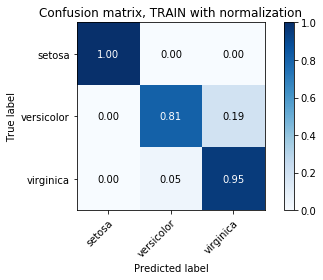

In [68]:
plot_confusion_matrix(y_train, y_pred_train, classes=class_names, normalize=True,
                      title='Confusion matrix, TRAIN with normalization')

plt.show()

<font color='blue'>Plot TEST normalized confusion matrix
</font>

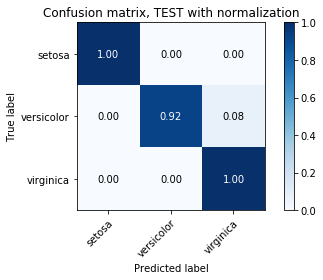

In [64]:
plot_confusion_matrix(y_test, y_pred_test, classes=class_names, normalize=True,
                      title='Confusion matrix, TEST with normalization')

plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

<font color='blue'>Iris Setosa Random Forrest
</font>

In [75]:
iris = load_iris()

In [77]:
X = iris.data
y = iris.target

In [85]:
class_names = iris.target_names

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [103]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=55)

In [104]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=55, verbose=0,
                       warm_start=False)

In [105]:
clf.feature_importances_

array([0.09937481, 0.03257808, 0.49154472, 0.3765024 ])

In [106]:
y_pred_train_rf = clf.predict(X_train)

In [107]:
y_pred_test_rf = clf.predict(X_test)

In [112]:
accuracy_score(y_train, y_pred_train_rf)

0.9916666666666667

In [113]:
accuracy_score(y_test, y_pred_test_rf)

0.9666666666666667

In [110]:
f1_score(y_train, y_pred_train_rf, average='weighted')

0.9916666666666667

In [111]:
f1_score(y_test, y_pred_test_rf, average='weighted')

0.9665141113653699

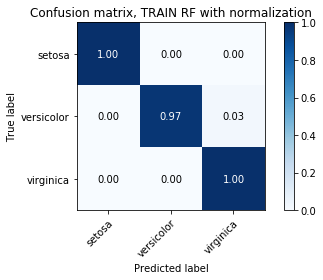

In [108]:
plot_confusion_matrix(y_train, y_pred_train_rf, classes=class_names, normalize=True,
                      title='Confusion matrix, TRAIN RF with normalization')

plt.show()

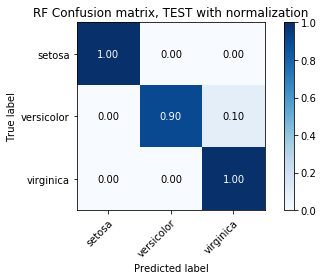

In [109]:
plot_confusion_matrix(y_test, y_pred_test_rf, classes=class_names, normalize=True,
                      title='RF Confusion matrix, TEST with normalization')

plt.show()

<font color='blue'>Random forrest with MAX DEPTH 5 performs better on train that on test. <br>
    And test is doing slightly worst than LogisticRegresion.<br>
</font>